Thống kê dữ liệu


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- CÀI ĐẶT CHO HIỂN THỊ TIẾNG VIỆT TRÊN BIỂU ĐỒ (TÙY CHỌN) ---
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['axes.unicode_minus'] = False

# 1. Load the data
try:
    df = pd.read_csv('/content/Bitcoin.csv',delimiter=';')
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file coin_Bitcoin.csv. Vui lòng đảm bảo file nằm trong cùng thư mục.")
    exit()

# 2. Preprocessing cơ bản cho EDA
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True) # Đặt Date làm index để dễ dàng shift và align

# --- THỐNG KÊ MÔ TẢ ---
print("--- Thống Kê Mô Tả Cơ Bản ---")
numeric_cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
print(df[numeric_cols].describe())
print("\n")

# --- TRỰC QUAN HÓA CƠ BẢN (giữ nguyên như trước) ---
# (Code cho các biểu đồ 1-5 đã có ở trên, bạn có thể giữ lại hoặc lược bớt nếu chỉ tập trung vào phần mới)
# Ví dụ, giữ lại biểu đồ xu hướng giá Close:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Giá đóng cửa (Close)', color='blue') # Sử dụng df.index
plt.title('Xu Hướng Giá Bitcoin Theo Thời Gian', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Giá (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('bitcoin_price_trend.png')
print("Đã lưu biểu đồ bitcoin_price_trend.png")
# plt.show()

# --- PHÂN TÍCH TƯƠNG QUAN TRỄ (ACF & PACF cho Close) ---
# (Code cho ACF, PACF của Close đã có ở trên, bạn có thể giữ lại)
time_series_close = df['Close'].dropna()
plt.figure(figsize=(12, 6))
plot_acf(time_series_close, lags=40, alpha=0.05)
plt.title('Biểu Đồ Tự Tương Quan (ACF) - Giá Đóng Cửa Bitcoin', fontsize=16)
plt.xlabel('Độ trễ (Lags)', fontsize=12)
plt.ylabel('Tự tương quan (Autocorrelation)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('bitcoin_acf_plot.png')
print("Đã lưu biểu đồ bitcoin_acf_plot.png")
# plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(time_series_close, lags=40, alpha=0.05, method='ywm')
plt.title('Biểu Đồ Tự Tương Quan Riêng Phần (PACF) - Giá Đóng Cửa Bitcoin', fontsize=16)
plt.xlabel('Độ trễ (Lags)', fontsize=12)
plt.ylabel('Tự tương quan riêng phần (Partial Autocorrelation)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('bitcoin_pacf_plot.png')
print("Đã lưu biểu đồ bitcoin_pacf_plot.png")
# plt.show()


# --- TÍNH TOÁN VÀ TRỰC QUAN HÓA TƯƠNG QUAN TRỄ CHÉO (CROSS-CORRELATION) ---
print("\n--- Phân Tích Tương Quan Trễ Chéo với Giá Đóng Cửa (Close) ---")

target_variable = 'Close'
predictor_variables = ['Open', 'High', 'Low', 'Volume']
max_lags = 30  # Số ngày trễ tối đa muốn xem xét (ví dụ: 30 ngày)

# Tạo DataFrame để lưu trữ các giá trị tương quan trễ
lagged_correlations_df = pd.DataFrame(index=range(1, max_lags + 1))

for pred_var in predictor_variables:
    correlations = []
    for lag in range(1, max_lags + 1):
        # Tính tương quan giữa target_variable hiện tại và predictor_variable trễ `lag` ngày
        # df[pred_var].shift(lag) sẽ tạo ra giá trị của pred_var từ `lag` ngày trước
        # .corr() sẽ tự động align theo index (Date) và bỏ qua các cặp có NaN (do shift)
        correlation = df[target_variable].corr(df[pred_var].shift(lag))
        correlations.append(correlation)
    lagged_correlations_df[f'Corr({target_variable}, {pred_var}_lag{lag})'] = correlations
    # Đặt tên cột rõ ràng hơn cho legend
    lagged_correlations_df.rename(columns={f'Corr({target_variable}, {pred_var}_lag{lag})': f'{pred_var} (lagged) vs {target_variable}'}, inplace=True)


# Trực quan hóa các tương quan trễ
plt.figure(figsize=(9, 4.5))
for column in lagged_correlations_df.columns:
    plt.plot(lagged_correlations_df.index, lagged_correlations_df[column], marker='o', linestyle='-', label=column)

plt.title(f'Tương Quan Trễ Của Các Biến Với Giá Đóng Cửa ({target_variable})', fontsize=16)
plt.xlabel('Độ trễ (Số Ngày)', fontsize=12)
plt.ylabel('Hệ số tương quan', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--') # Đường tham chiếu y=0
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(range(1, max_lags + 1, 2)) # Hiển thị tick mỗi 2 ngày cho dễ nhìn
plt.tight_layout()
plt.savefig('bitcoin_cross_correlation_lagged.png')
print("Đã lưu biểu đồ bitcoin_cross_correlation_lagged.png")
# plt.show()

print("\nEDA hoàn thành. Các biểu đồ đã được lưu vào thư mục hiện tại.")

--- Thống Kê Mô Tả Cơ Bản ---
                High            Low           Open          Close  \
count    1943.000000    1943.000000    1943.000000    1943.000000   
mean    33259.061658   31917.791311   32601.133028   32627.552029   
std     27894.459791   26816.031391   27351.985206   27395.255696   
min      3275.377827    3191.303562    3236.274773    3236.761645   
25%      9540.444332    9231.213776    9375.005225    9376.244392   
50%     23666.962254   22722.265123   23179.527050   23175.890849   
75%     48132.955690   46356.491059   47161.450642   47137.602737   
max    109114.884834  105291.737868  106147.295260  106146.263007   

             Volume     Marketcap  
count  1.943000e+03  1.943000e+03  
mean   2.597562e+10  6.314576e+11  
std    1.830193e+10  5.476941e+11  
min    2.923670e+09  5.640069e+10  
25%    1.288747e+10  1.703275e+11  
50%    2.378866e+10  4.410172e+11  
75%    3.458410e+10  9.004556e+11  
max    1.492189e+11  2.102916e+12  


Đã lưu biểu đồ bitcoin

LinearRegression 0.8

<ipython-input-3-34cba11fef1f>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_processed.fillna(method='ffill', inplace=True) # Forward fill


Training set size: 1530
Test set size: 383

--- Model Evaluation ---
Training RMSE: $1121.59
Training MAE: $505.00
Training R-squared: 0.9950
Training MAPE: 2.46%

Test RMSE: $2088.79
Test MAE: $1486.25
Test R-squared: 0.9827
Test MAPE: 1.93%

Feature Coefficients:
Lag_1: 1.0398
Lag_3: 0.0409
Lag_7: 0.0386
Lag_14: 0.0248
Lag_30: -0.0115
Rolling_Mean_7: -0.1284
Rolling_Mean_30: -0.0052
Intercept: 47.3933


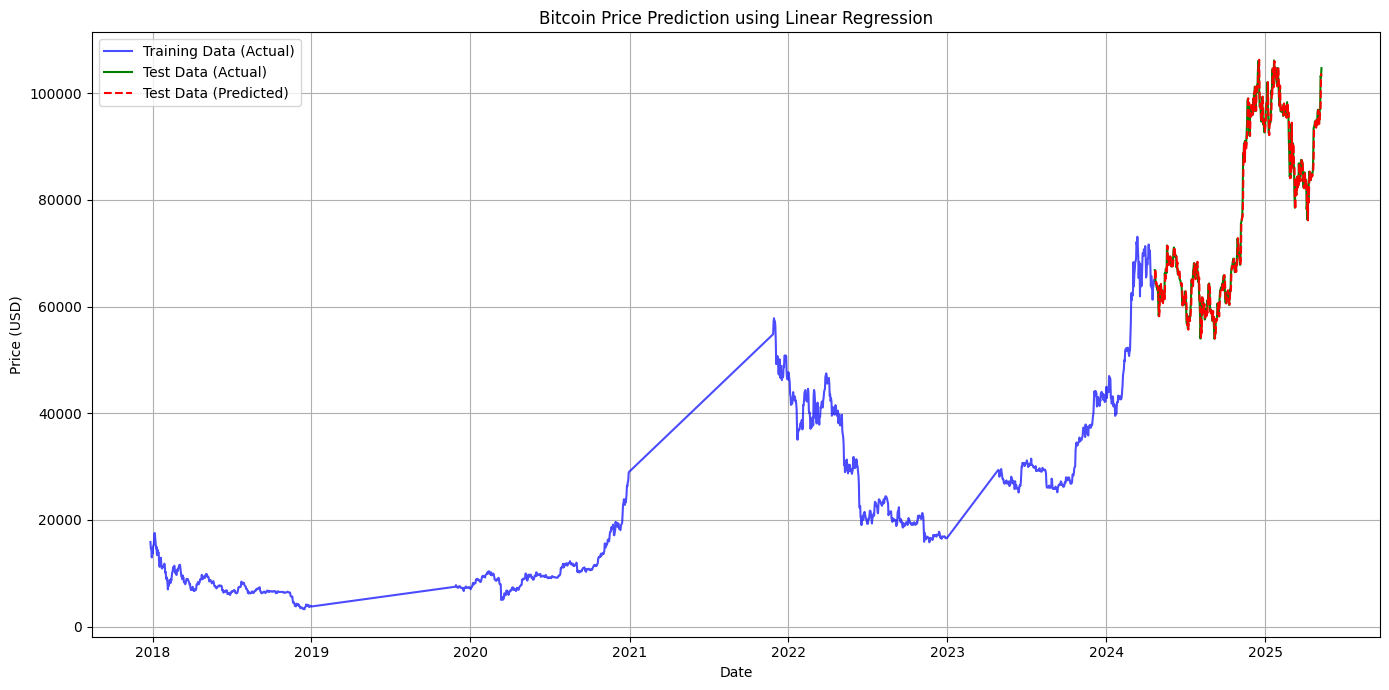


--- Next Day Forecast ---
Last actual Close on 2025-05-10: $104696.33
Features used for next day prediction: 
  Lag_1: 104696.33
  Lag_3: 103241.46
  Lag_7: 94315.97
  Lag_14: 93754.85
  Lag_30: 83404.84
  Rolling_Mean_7: 99115.35
  Rolling_Mean_30: 92083.50
Predicted Close for 2025-05-11: $104935.59


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error


# 1. Load the data
# Assuming the CSV content is in a file named 'coin_Bitcoin.csv'
# If you're running this in an environment where the file isn't present,
# you'd need to create it with the provided content.
try:
    df = pd.read_csv('/content/Bitcoin.csv',delimiter=';')
except FileNotFoundError:
    print("Error: coin_Bitcoin.csv not found. Please ensure the file is in the same directory.")
    exit()

# 2. Preprocessing

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Select relevant columns (initially, we'll focus on 'Close')
# We can add 'Open', 'High', 'Low', 'Volume', 'Marketcap' as features later if needed,
# but they should also be lagged to avoid data leakage for true forecasting.
df_processed = df[['Close']].copy()
# Handle any potential missing values (though this dataset seems clean for 'Close')
df_processed.fillna(method='ffill', inplace=True) # Forward fill
# 3. Feature Engineering
# Target variable
target_col = 'Close'
# Lagged features (e.g., price from 1, 3, 7 days ago)
for lag in [1, 3, 7, 14, 30]: # Number of days to lag
    df_processed[f'Lag_{lag}'] = df_processed[target_col].shift(lag)
# Rolling mean (e.g., average price over the last 7 days)
# We shift by 1 because the rolling mean should be calculated on data *before* the current day
df_processed['Rolling_Mean_7'] = df_processed[target_col].rolling(window=7).mean().shift(1)
df_processed['Rolling_Mean_30'] = df_processed[target_col].rolling(window=30).mean().shift(1)

# Drop rows with NaN values created by shift() and rolling()
df_processed.dropna(inplace=True)

# Define features (X) and target (y)
features = [col for col in df_processed.columns if col != target_col]
X = df_processed[features]
y = df_processed[target_col]

if X.empty or y.empty:
    print("Not enough data to create features and target after processing. Try reducing lags or window sizes.")
    exit()

# 4. Split data chronologically
# We cannot use a random train_test_split for time series.
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

if len(X_train) == 0 or len(X_test) == 0:
    print("Training or test set is empty. Adjust split or check data.")
    exit()

# 5. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("\n--- Model Evaluation ---")
# Tính các chỉ số
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100  # Chuyển sang %

# In kết quả
print(f"Training RMSE: ${rmse_train:.2f}")
print(f"Training MAE: ${mae_train:.2f}")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Training MAPE: {mape_train:.2f}%")

# Test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100
print(f"\nTest RMSE: ${rmse_test:.2f}")
print(f"Test MAE: ${mae_test:.2f}")
print(f"Test R-squared: {r2_test:.4f}")
print(f"Test MAPE: {mape_test:.2f}%")

# Feature importance (coefficients)
print("\nFeature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


# 7. Visualize predictions
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Training Data (Actual)', color='blue', alpha=0.7)
plt.plot(y_test.index, y_test, label='Test Data (Actual)', color='green')
plt.plot(X_test.index, y_pred_test, label='Test Data (Predicted)', color='red', linestyle='--')
# plt.plot(X_train.index, y_pred_train, label='Training Data (Predicted)', color='orange', linestyle=':', alpha=0.5) # Optional: plot training predictions
plt.title('Bitcoin Price Prediction using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Make a sample forecast for the next day
# To predict the next day, we need the most recent features
# These features are derived from the last 'n' days of actual 'Close' prices

last_actual_date = df_processed.index[-1]
next_prediction_date = last_actual_date + pd.Timedelta(days=1)

# Construct the feature vector for the next day
# The .iloc[-1] of df_processed[target_col] is the most recent 'Close'
# The .iloc[-1] of df_processed['Lag_1'] is the 'Close' from 2 days ago, etc.

# So, for the next day's prediction:
# Lag_1 will be today's Close (df_processed[target_col].iloc[-1])
# Lag_3 will be Close from 2 days ago (df_processed[target_col].iloc[-3])
# ...and so on.
# Rolling_Mean_7 will be the mean of the last 7 'Close' prices (including today's)

next_day_features = []
# Lags
for lag in [1, 3, 7, 14, 30]:
    if lag == 1:
        next_day_features.append(df_processed[target_col].iloc[-1])
    else:
        next_day_features.append(df_processed[target_col].iloc[-lag]) # This is Close from (lag-1) days ago

# Rolling means
# For Rolling_Mean_7, we need the mean of the last 7 days *including* the most recent 'Close'
next_day_features.append(df_processed[target_col].iloc[-7:].mean())
next_day_features.append(df_processed[target_col].iloc[-30:].mean())


# Ensure the order of features matches the 'features' list
# This is a bit manual and error-prone if feature list changes.
# A more robust way would be to reconstruct a DataFrame row.
# For simplicity here, we'll assume the order is correct.
# features = ['Lag_1', 'Lag_3', 'Lag_7', 'Lag_14', 'Lag_30', 'Rolling_Mean_7', 'Rolling_Mean_30']

next_day_features_array = np.array(next_day_features).reshape(1, -1)
next_day_prediction = model.predict(next_day_features_array)

print(f"\n--- Next Day Forecast ---")
print(f"Last actual Close on {last_actual_date.date()}: ${df_processed[target_col].iloc[-1]:.2f}")
print(f"Features used for next day prediction: ")
for feature_name, feature_value in zip(features, next_day_features_array[0]):
    print(f"  {feature_name}: {feature_value:.2f}")
print(f"Predicted Close for {next_prediction_date.date()}: ${next_day_prediction[0]:.2f}")

LinearRegression 0.6

<ipython-input-3-daefd9805d23>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_processed.fillna(method='ffill', inplace=True) # Forward fill


Training set size: 1776
Test set size: 1185

--- Model Evaluation ---
Training RMSE: $237.70
Training MAE: $72.75
Training R-squared: 0.9944
Training MAPE: 3.57%

Test RMSE: $894.59
Test MAE: $423.16
Test R-squared: 0.9962
Test MAPE: 2.56%

Feature Coefficients:
Lag_1: 1.0323
Lag_3: -0.0041
Lag_7: 0.0468
Lag_14: 0.0101
Lag_30: 0.0023
Rolling_Mean_7: -0.0523
Rolling_Mean_30: -0.0382
Intercept: 8.1797


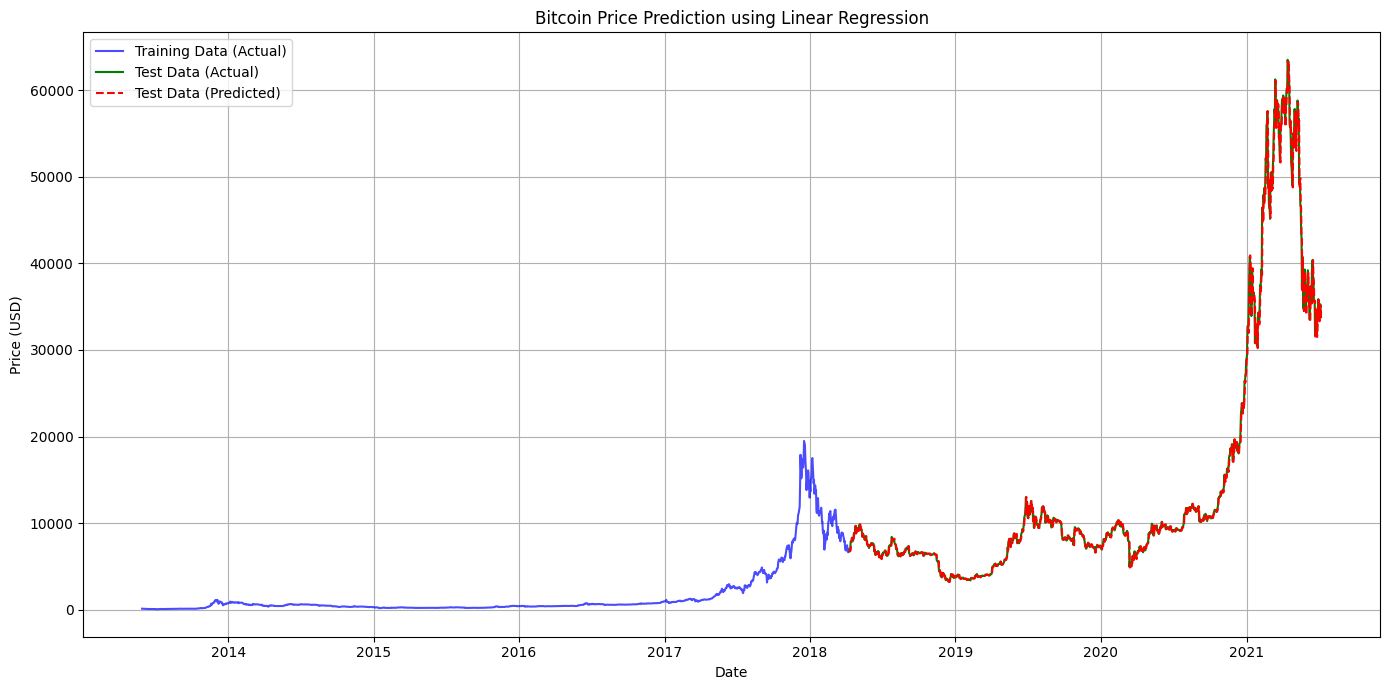


--- Next Day Forecast ---
Last actual Close on 2021-07-06: $34235.19
Features used for next day prediction: 
  Lag_1: 34235.19
  Lag_3: 35287.78
  Lag_7: 35040.84
  Lag_14: 33723.03
  Lag_30: 33560.71
  Rolling_Mean_7: 34349.65
  Rolling_Mean_30: 35299.46
Predicted Close for 2021-07-07: $34115.46


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error


# 1. Load the data
# Assuming the CSV content is in a file named 'coin_Bitcoin.csv'
# If you're running this in an environment where the file isn't present,
# you'd need to create it with the provided content.
try:
    df = pd.read_csv('/content/coin_Bitcoin.csv')
except FileNotFoundError:
    print("Error: coin_Bitcoin.csv not found. Please ensure the file is in the same directory.")
    exit()

# 2. Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Select relevant columns (initially, we'll focus on 'Close')
# We can add 'Open', 'High', 'Low', 'Volume', 'Marketcap' as features later if needed,
# but they should also be lagged to avoid data leakage for true forecasting.
df_processed = df[['Close']].copy()

# Handle any potential missing values (though this dataset seems clean for 'Close')
df_processed.fillna(method='ffill', inplace=True) # Forward fill

# 3. Feature Engineering
# Target variable
target_col = 'Close'

# Lagged features (e.g., price from 1, 3, 7 days ago)
for lag in [1, 3, 7, 14, 30]: # Number of days to lag
    df_processed[f'Lag_{lag}'] = df_processed[target_col].shift(lag)

# Rolling mean (e.g., average price over the last 7 days)
# We shift by 1 because the rolling mean should be calculated on data *before* the current day
df_processed['Rolling_Mean_7'] = df_processed[target_col].rolling(window=7).mean().shift(1)
df_processed['Rolling_Mean_30'] = df_processed[target_col].rolling(window=30).mean().shift(1)

# Drop rows with NaN values created by shift() and rolling()
df_processed.dropna(inplace=True)

# Define features (X) and target (y)
features = [col for col in df_processed.columns if col != target_col]
X = df_processed[features]
y = df_processed[target_col]

if X.empty or y.empty:
    print("Not enough data to create features and target after processing. Try reducing lags or window sizes.")
    exit()

# 4. Split data chronologically
# We cannot use a random train_test_split for time series.
split_ratio = 0.6
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

if len(X_train) == 0 or len(X_test) == 0:
    print("Training or test set is empty. Adjust split or check data.")
    exit()

# 5. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("\n--- Model Evaluation ---")
# Tính các chỉ số
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100  # Chuyển sang %

# In kết quả
print(f"Training RMSE: ${rmse_train:.2f}")
print(f"Training MAE: ${mae_train:.2f}")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Training MAPE: {mape_train:.2f}%")

# Test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100
print(f"\nTest RMSE: ${rmse_test:.2f}")
print(f"Test MAE: ${mae_test:.2f}")
print(f"Test R-squared: {r2_test:.4f}")
print(f"Test MAPE: {mape_test:.2f}%")

# Feature importance (coefficients)
print("\nFeature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


# 7. Visualize predictions
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Training Data (Actual)', color='blue', alpha=0.7)
plt.plot(y_test.index, y_test, label='Test Data (Actual)', color='green')
plt.plot(X_test.index, y_pred_test, label='Test Data (Predicted)', color='red', linestyle='--')
# plt.plot(X_train.index, y_pred_train, label='Training Data (Predicted)', color='orange', linestyle=':', alpha=0.5) # Optional: plot training predictions
plt.title('Bitcoin Price Prediction using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Make a sample forecast for the next day
# To predict the next day, we need the most recent features
# These features are derived from the last 'n' days of actual 'Close' prices

last_actual_date = df_processed.index[-1]
next_prediction_date = last_actual_date + pd.Timedelta(days=1)

# Construct the feature vector for the next day
# The .iloc[-1] of df_processed[target_col] is the most recent 'Close'
# The .iloc[-1] of df_processed['Lag_1'] is the 'Close' from 2 days ago, etc.

# So, for the next day's prediction:
# Lag_1 will be today's Close (df_processed[target_col].iloc[-1])
# Lag_3 will be Close from 2 days ago (df_processed[target_col].iloc[-3])
# ...and so on.
# Rolling_Mean_7 will be the mean of the last 7 'Close' prices (including today's)

next_day_features = []
# Lags
for lag in [1, 3, 7, 14, 30]:
    if lag == 1:
        next_day_features.append(df_processed[target_col].iloc[-1])
    else:
        next_day_features.append(df_processed[target_col].iloc[-lag]) # This is Close from (lag-1) days ago

# Rolling means
# For Rolling_Mean_7, we need the mean of the last 7 days *including* the most recent 'Close'
next_day_features.append(df_processed[target_col].iloc[-7:].mean())
next_day_features.append(df_processed[target_col].iloc[-30:].mean())


# Ensure the order of features matches the 'features' list
# This is a bit manual and error-prone if feature list changes.
# A more robust way would be to reconstruct a DataFrame row.
# For simplicity here, we'll assume the order is correct.
# features = ['Lag_1', 'Lag_3', 'Lag_7', 'Lag_14', 'Lag_30', 'Rolling_Mean_7', 'Rolling_Mean_30']

next_day_features_array = np.array(next_day_features).reshape(1, -1)
next_day_prediction = model.predict(next_day_features_array)

print(f"\n--- Next Day Forecast ---")
print(f"Last actual Close on {last_actual_date.date()}: ${df_processed[target_col].iloc[-1]:.2f}")
print(f"Features used for next day prediction: ")
for feature_name, feature_value in zip(features, next_day_features_array[0]):
    print(f"  {feature_name}: {feature_value:.2f}")
print(f"Predicted Close for {next_prediction_date.date()}: ${next_day_prediction[0]:.2f}")